In [59]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#loaded Data
file_path = '../Data/raw_analyst_ratings.csv'

df = pd.read_csv(file_path)

In [ ]:
#get info about the data
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Unnamed: 0  1407328 non-null  int64              
 1   headline    1407328 non-null  object             
 2   url         1407328 non-null  object             
 3   publisher   1407328 non-null  object             
 4   date        55987 non-null    datetime64[ns, UTC]
 5   stock       1407328 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 64.4+ MB
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [ ]:
#convert date column to datetime from object
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)


In [ ]:
# check for null
print(df.isnull().sum())

Unnamed: 0     0
headline       0
url            0
publisher      0
date           0
stock          0
parsed_date    0
dtype: int64


In [85]:
# get headlines and their counts
# Count the occurrences of each headline
headline_counts = df['headline'].value_counts()

print(headline_counts)

headline
Benzinga's Top Upgrades                                                                                                                                                                                                                            5449
Benzinga's Top Downgrades                                                                                                                                                                                                                          5372
Benzinga's Top Initiations                                                                                                                                                                                                                         4241
Stocks That Hit 52-Week Lows On Thursday                                                                                                                                                                                                           3962

In [66]:
print(df['stock'].value_counts())

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64


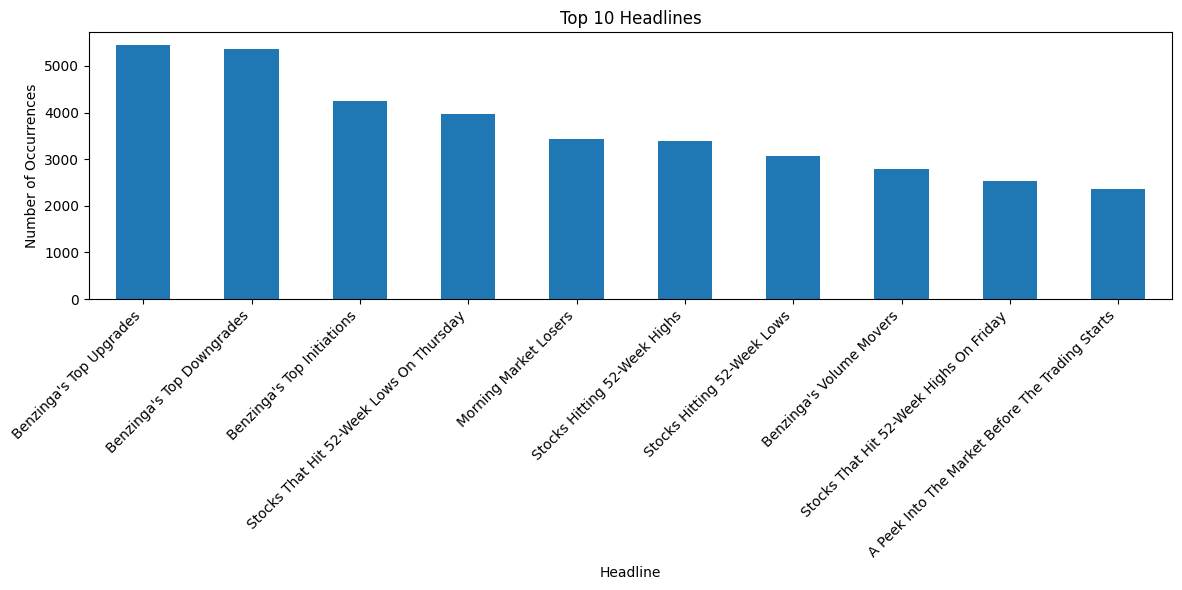

In [86]:

# Get the top 10 headlines
top_7_headlines = headline_counts.head(10)

# Create a bar chart for the top 10 headlines
plt.figure(figsize=(12, 6))
top_7_headlines.plot(kind='bar')
plt.title('Top 10 Headlines')
plt.xlabel('Headline')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

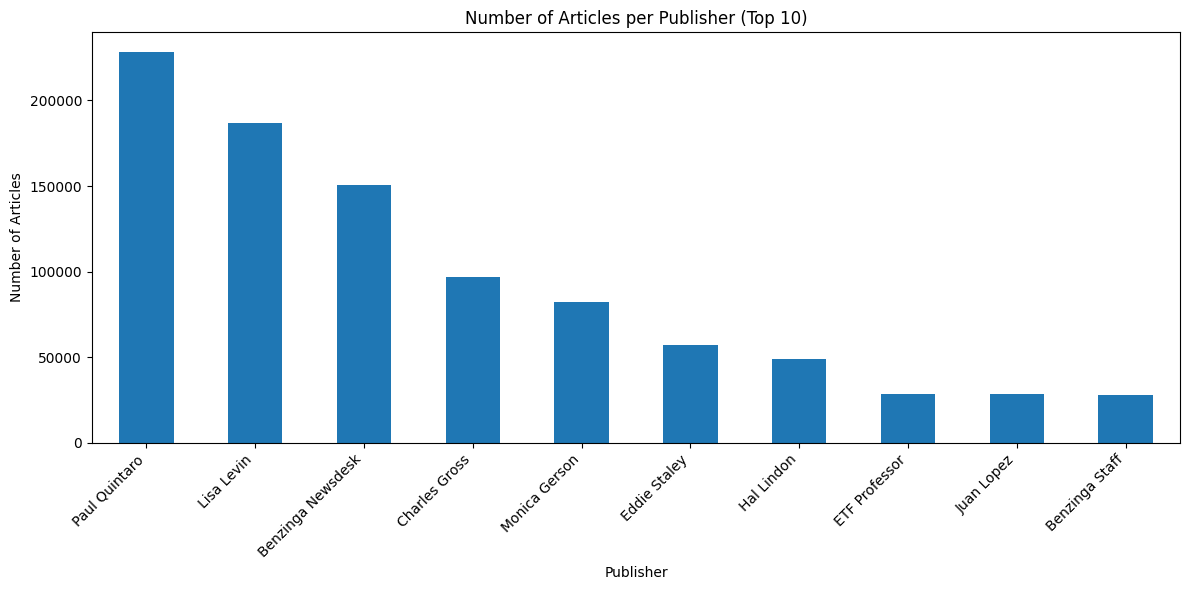

In [68]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Get the top 10 publishers
top_10_publishers = publisher_counts.head(10)

# Create a bar chart for the top 10
plt.figure(figsize=(12, 6))
top_10_publishers.plot(kind='bar')
plt.title('Number of Articles per Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [71]:
print(df['parsed_date'].dtype)


object


In [79]:
df['day_of_week'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

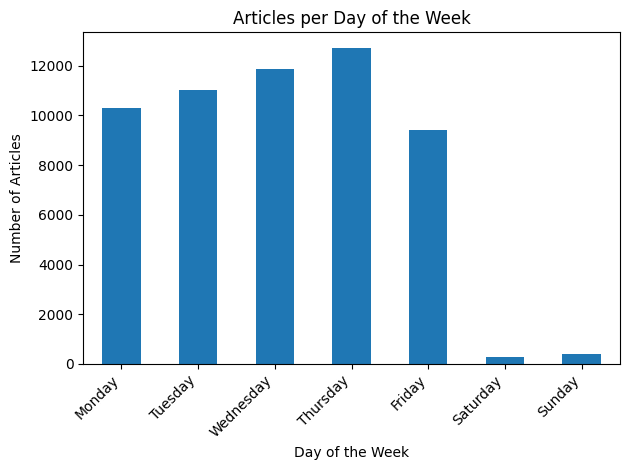

In [ ]:

df['day_of_week'] = df['date'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_counts = df['day_of_week'].value_counts().reindex(day_order)

daily_counts.plot(kind='bar')
plt.title('Articles per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

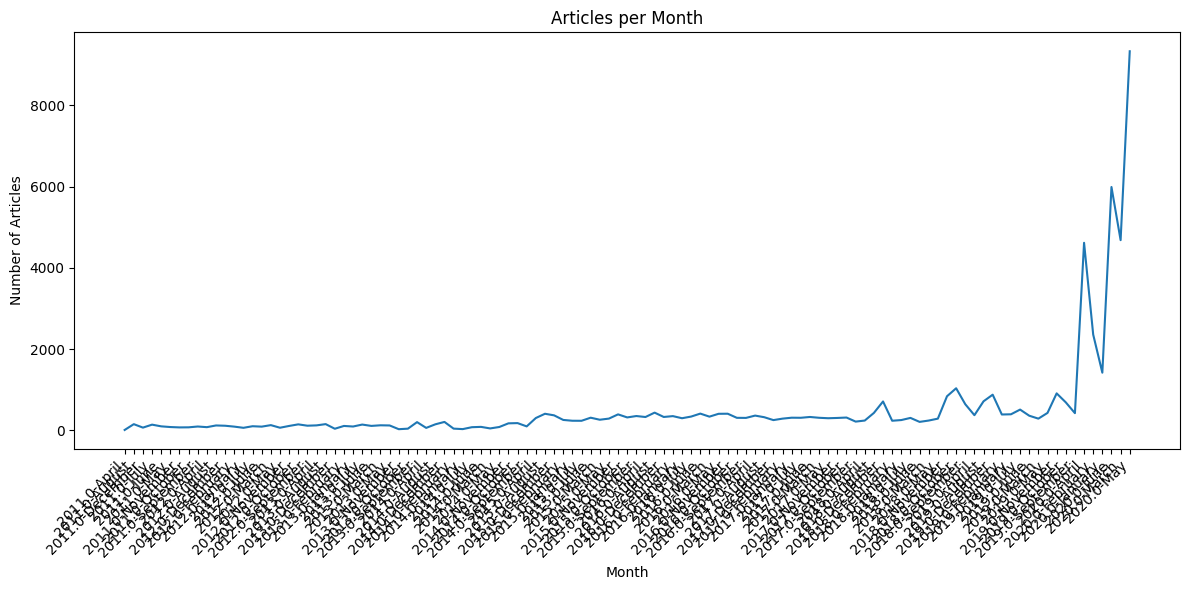

In [82]:
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['year'].astype(str) + '-' + monthly_counts['month'], monthly_counts['count'])
plt.title('Articles per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()